In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

  

Mounted at /content/gdrive


In [ ]:
pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 21.8 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import datetime as dt
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import sklearn.metrics as mt
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
path = "/content/gdrive/My Drive/ctsd/train.tsv"
df = pd.read_csv(path, sep = '\t')
df.head(5)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [ ]:
df.drop_duplicates(subset="SentenceId", keep="first", inplace=True)
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
63,64,2,"This quiet , introspective and entertaining in...",4
81,82,3,"Even fans of Ismail Merchant 's work , I suspe...",1
116,117,4,A positively thrilling combination of ethnogra...,3
156,157,5,Aggressive self-glorification and a manipulati...,1


In [ ]:
df.shape


(8529, 4)

In [ ]:
seqlen = df["Phrase"].apply(lambda x: len(x.split()))
print(seqlen.shape)

(8529,)


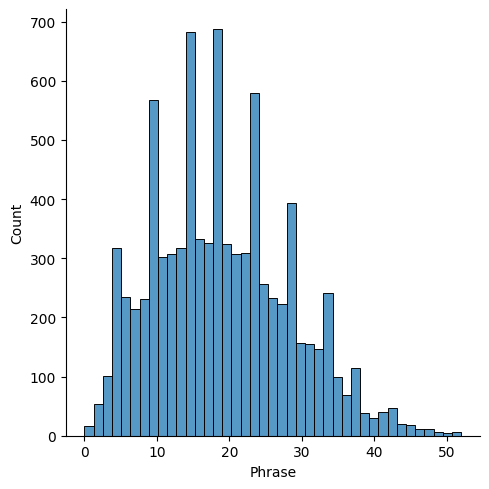

<Figure size 3000x1500 with 0 Axes>

In [ ]:

sns.displot(seqlen)

sns.set_style("darkgrid")
plt.figure(figsize=(30, 15))
plt.show()

In [ ]:
SEQ_LEN = 50
df['Rating'] = df['Sentiment'] >=3
df.head()
vectorizer = CountVectorizer()
train_data,test_data = train_test_split(df,train_size=0.8,random_state=0)
# select the columns and 
# prepare data for the models 
X_train = vectorizer.fit_transform(train_data['Phrase'])
y_train = train_data['Rating']
X_test = vectorizer.transform(test_data['Phrase'])
y_test = test_data['Rating']


In [ ]:
start=dt.datetime.now()
lr = LogisticRegression()
lr.fit(X_train,y_train)
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:00:00.517337


In [ ]:
print("Logistic Regression")
print(mt.classification_report(y_test, lr.predict(X_test)))

Logistic Regression
              precision    recall  f1-score   support

       False       0.79      0.83      0.81      1014
        True       0.73      0.67      0.70       692

    accuracy                           0.77      1706
   macro avg       0.76      0.75      0.75      1706
weighted avg       0.76      0.77      0.77      1706



In [ ]:
start=dt.datetime.now()
nb = MultinomialNB()
nb.fit(X_train,y_train)
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:00:00.014031


In [ ]:
print("\n Naive Bayes")
print(mt.classification_report(y_test, nb.predict(X_test)))



 Naive Bayes
              precision    recall  f1-score   support

       False       0.79      0.84      0.81      1014
        True       0.74      0.67      0.70       692

    accuracy                           0.77      1706
   macro avg       0.76      0.75      0.76      1706
weighted avg       0.77      0.77      0.77      1706



In [ ]:
start=dt.datetime.now()
svm = SVC()
svm.fit(X_train,y_train)
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:00:08.049103


In [ ]:
print("\n Support Vector Machine (SVM)")
print(mt.classification_report(y_test, svm.predict(X_test)))


 Support Vector Machine (SVM)
              precision    recall  f1-score   support

       False       0.73      0.88      0.80      1014
        True       0.75      0.53      0.62       692

    accuracy                           0.74      1706
   macro avg       0.74      0.70      0.71      1706
weighted avg       0.74      0.74      0.73      1706



In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

In [ ]:

tokens = tokenizer.encode_plus("this should work", max_length=SEQ_LEN, 
                               truncation=True, padding="max_length",
                               add_special_tokens=True, return_token_type_ids=False,
                               return_attention_mask=True, return_tensors="tf"
                              )

tokens

{'input_ids': <tf.Tensor: shape=(1, 50), dtype=int32, numpy=
array([[ 101, 1142, 1431, 1250,  102,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 50), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]], dtype=int32)>}

In [ ]:
Xids = np.zeros((len(df), SEQ_LEN))
Xmask = np.zeros((len(df), SEQ_LEN))

Xids.shape, Xmask.shape

((8529, 50), (8529, 50))

In [ ]:
for i, sequence in enumerate(df["Phrase"]):
    tokens = tokenizer.encode_plus(sequence, max_length=SEQ_LEN, 
                               truncation=True, padding="max_length",
                               add_special_tokens=True, return_token_type_ids=False,
                               return_attention_mask=True, return_tensors="tf"
                              )
    Xids[i, :], Xmask[i, :] = tokens["input_ids"], tokens["attention_mask"]

In [ ]:
Xids[0]

NameError: ignored

In [ ]:
Xmask[0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.])

In [ ]:
df["Sentiment"].value_counts()


3    2321
1    2200
2    1655
4    1281
0    1072
Name: Sentiment, dtype: int64

In [ ]:
arr = df["Sentiment"].values
labels = np.zeros((arr.size, arr.max()+1))
labels[np.arange(arr.size), arr] = 1
labels

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [ ]:
Xids.shape, Xmask.shape, labels.shape

((8529, 50), (8529, 50), (8529, 5))

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels))

In [ ]:
for i in dataset.take(1):
    print(i)

(<tf.Tensor: shape=(50,), dtype=float64, numpy=
array([  101.,   138.,  1326.,  1104., 13936., 25265., 16913., 15107.,
        1103.,  8050.,  2553.,  1115.,  1184.,  1110.,  1363.,  1111.,
        1103., 20398.,  1110.,  1145.,  1363.,  1111.,  1103.,   176.,
        9900.,   117.,  1199.,  1104.,  1134.,  5411.,  1821., 14225.,
        1133.,  3839.,  1104.,  1134.,  7919.,  1106.,  1277.,  1104.,
         170.,  1642.,   119.,   102.,     0.,     0.,     0.,     0.,
           0.,     0.])>, <tf.Tensor: shape=(50,), dtype=float64, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.])>, <tf.Tensor: shape=(5,), dtype=float64, numpy=array([0., 1., 0., 0., 0.])>)


In [ ]:
def map_func(input_ids, masks, labels):
    return {"input_ids": input_ids, "attention_mask": masks}, labels

In [ ]:
dataset = dataset.map(map_func)

for i in dataset.take(1):
    print(i)


({'input_ids': <tf.Tensor: shape=(50,), dtype=float64, numpy=
array([  101.,   138.,  1326.,  1104., 13936., 25265., 16913., 15107.,
        1103.,  8050.,  2553.,  1115.,  1184.,  1110.,  1363.,  1111.,
        1103., 20398.,  1110.,  1145.,  1363.,  1111.,  1103.,   176.,
        9900.,   117.,  1199.,  1104.,  1134.,  5411.,  1821., 14225.,
        1133.,  3839.,  1104.,  1134.,  7919.,  1106.,  1277.,  1104.,
         170.,  1642.,   119.,   102.,     0.,     0.,     0.,     0.,
           0.,     0.])>, 'attention_mask': <tf.Tensor: shape=(50,), dtype=float64, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.])>}, <tf.Tensor: shape=(5,), dtype=float64, numpy=array([0., 1., 0., 0., 0.])>)


In [ ]:
dataset = dataset.shuffle(1000000).batch(32)

In [ ]:
DS_LEN = len(dataset)
SPLIT = 0.8

train_data = dataset.take(round(DS_LEN * SPLIT))
val_data = dataset.skip(round(DS_LEN * SPLIT))

del dataset

In [ ]:
from transformers import TFAutoModel

bert = TFAutoModel.from_pretrained("bert-base-cased")

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
input_ids = tf.keras.layers.Input(shape=(SEQ_LEN, ), name="input_ids", dtype="int32")
mask = tf.keras.layers.Input(shape=(SEQ_LEN, ), name="attention_mask", dtype="int32")

embeddings = bert(input_ids, attention_mask=mask)[0]

X = tf.keras.layers.GlobalMaxPool1D()(embeddings)
X = tf.keras.layers.BatchNormalization()(X)
X = tf.keras.layers.Dense(64, activation="relu")(X)
X = tf.keras.layers.Dense(128, activation="relu")(X)
X = tf.keras.layers.Dropout(0.1)(X)
X = tf.keras.layers.Dense(64, activation="relu")(X)
X = tf.keras.layers.Dense(32, activation="relu")(X)

y = tf.keras.layers.Dense(5, activation="softmax",  name="outputs")(X)

model = tf.keras.Model(inputs=[input_ids, mask], outputs=y)

model.layers[2].trainable = False

In [ ]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=8),
            tf.keras.callbacks.ModelCheckpoint("/defult/working/models/dense_transformer_model.h5",verbose= 1 ,save_best_only=True)]

optimizer = tf.keras.optimizers.Adam(0.001)
loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy("accuracy")

model.compile(optimizer=optimizer, loss=loss, metrics=[acc])

In [ ]:
history = model.fit(train_data, 
                   validation_data=val_data,
                   epochs=50,
                   callbacks=callbacks
                   )

Epoch 1/50
240/240 [==============================] - ETA: 0s - loss: 1.4364 - accuracy: 0.3607
Epoch 1: val_loss improved from inf to 1.28375, saving model to /defult/working/models/dense_transformer_model.h5
240/240 [==============================] - 60s 158ms/step - loss: 1.4364 - accuracy: 0.3607 - val_loss: 1.2838 - val_accuracy: 0.4499
Epoch 2/50
240/240 [==============================] - ETA: 0s - loss: 1.3034 - accuracy: 0.4302
Epoch 2: val_loss improved from 1.28375 to 1.15685, saving model to /defult/working/models/dense_transformer_model.h5
240/240 [==============================] - 37s 153ms/step - loss: 1.3034 - accuracy: 0.4302 - val_loss: 1.1569 - val_accuracy: 0.4876
Epoch 3/50
240/240 [==============================] - ETA: 0s - loss: 1.2690 - accuracy: 0.4475
Epoch 3: val_loss did not improve from 1.15685
240/240 [==============================] - 33s 137ms/step - loss: 1.2690 - accuracy: 0.4475 - val_loss: 1.2041 - val_accuracy: 0.4900
Epoch 4/50
240/240 [===========

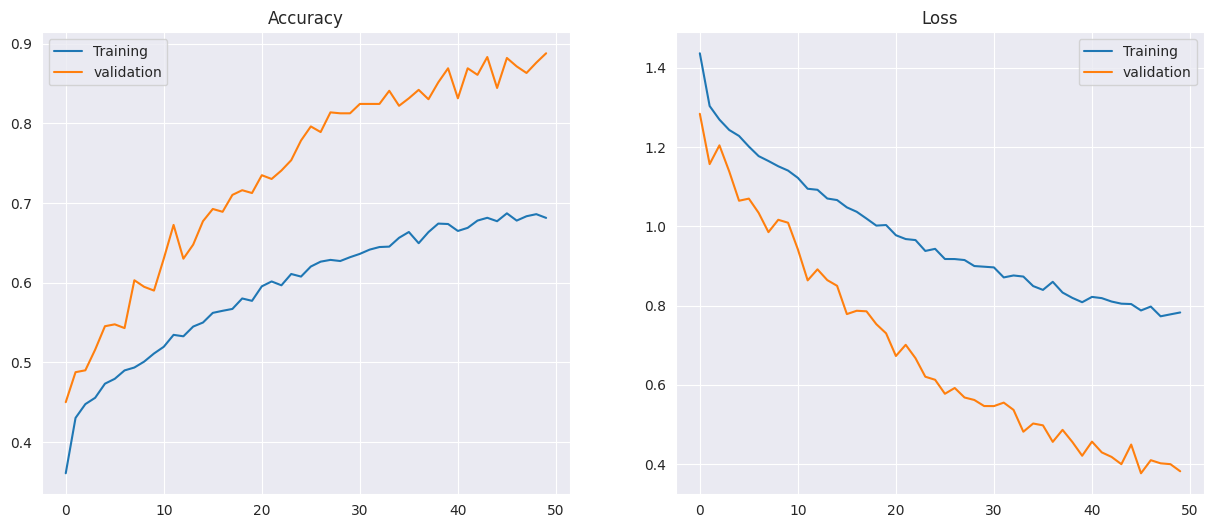

In [ ]:
hist = history
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(hist.epoch,hist.history['accuracy'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_accuracy'],label = 'validation')

plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.epoch,hist.history['loss'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_loss'],label = 'validation')

plt.title("Loss")
plt.legend()
plt.show()

In [ ]:
def map_to_input(sen:str, seq_len:int):
    tokens = tokenizer.encode_plus(sen, max_length=seq_len, 
                               truncation=True, padding="max_length",
                               add_special_tokens=True, return_token_type_ids=False,
                               return_attention_mask=True, return_tensors="tf"
                              )
    
    return tokens

In [ ]:
from transformers import TFBertModel

# Define the custom objects dictionary with the TFBertModel layer
custom_objects = {'TFBertModel': TFBertModel}

# Load the model and pass the custom objects dictionary
model = tf.keras.models.load_model('/defult/working/models/dense_transformer_model.h5', custom_objects=custom_objects)

In [ ]:
classes = {
    0: 1,
    1: 2,
    2:3,
    3:4,
    4: 5
}

In [ ]:
test_data = pd.read_csv("/content/gdrive/My Drive/ctsd/test.tsv", sep="\t")
test_data.drop_duplicates(subset="SentenceId", keep="first", inplace=True)
test_data.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
15,156076,8546,Kidman is really the only thing that 's worth ...
93,156154,8547,Once you get into its rhythm ... the movie bec...
117,156178,8548,I kept wishing I was watching a documentary ab...
158,156219,8549,"Kinnear does n't aim for our sympathy , but ra..."


In [ ]:
final_out = {}

for i in tqdm(range(100)):
    to_test = test_data["Phrase"].iloc[i]
#     print(to_test)

    test_input = map_to_input(to_test, SEQ_LEN)
    input_ids = test_input["input_ids"]
    mask = test_input["attention_mask"]
    
    pred = model.predict([input_ids, mask], verbose=0)
#     print(f"The output class is: {classes[np.argmax(pred[0])]}")
    final_out[to_test] = classes[np.argmax(pred[0])]

100%|██████████| 100/100 [00:12<00:00,  7.97it/s]


In [ ]:
for i in final_out.keys():
    print(f"{i[:100]} ==> {final_out[i]}\n")

An intermittently pleasing but mostly routine effort . ==> 3

Kidman is really the only thing that 's worth watching in Birthday Girl , a film by the stage-traine ==> 4

Once you get into its rhythm ... the movie becomes a heady experience . ==> 2

I kept wishing I was watching a documentary about the wartime Navajos and what they accomplished ins ==> 3

Kinnear does n't aim for our sympathy , but rather delivers a performance of striking skill and dept ==> 3

All ends well , sort of , but the frenzied comic moments never click . ==> 2

It 's a hoot and a half , and a great way for the American people to see what a candidate is like wh ==> 4

The weight of the piece , the unerring professionalism of the chilly production , and the fascinatio ==> 3

The film contains no good jokes , no good scenes , barely a moment when Carvey 's Saturday Night Liv ==> 2

An offbeat , sometimes gross and surprisingly appealing animated film about the true meaning of the  ==> 4

It suggests the wide-rang